In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
sns.set_theme()

In [12]:
diamonds = sns.load_dataset('diamonds')

In [13]:
#taking a quick look at the data
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [14]:
#Let's further analyze full dataframe
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


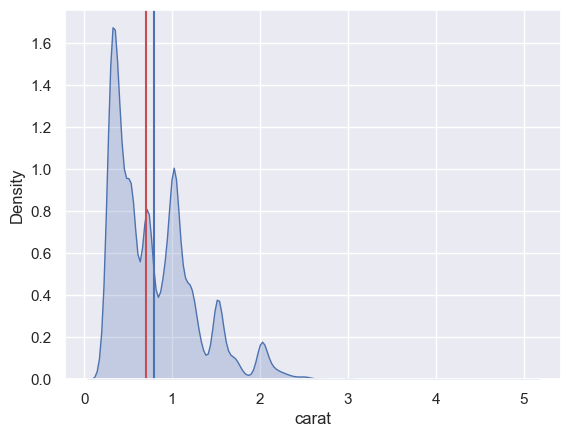

In [16]:
#taking a further look at the carat column let's look at distribution
sns.kdeplot(diamonds['carat'], fill=True)

#adding mean, median and quartile lines to the graph. median set to red
plt.axvline(diamonds['carat'].mean(), 0, 1)
plt.axvline(diamonds['carat'].median(), 0, 1, color='r')


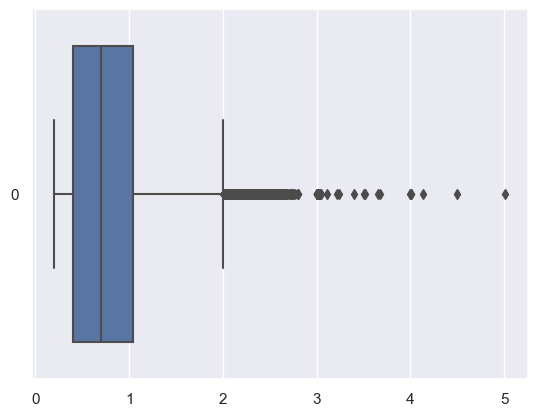

In [29]:
#let's take a look at the boxplot for carat to get a better sense of the outliers
p = sns.boxplot(diamonds['carat'], orient='h')

In [35]:
diamonds['carat_int'] = diamonds['carat'].round()

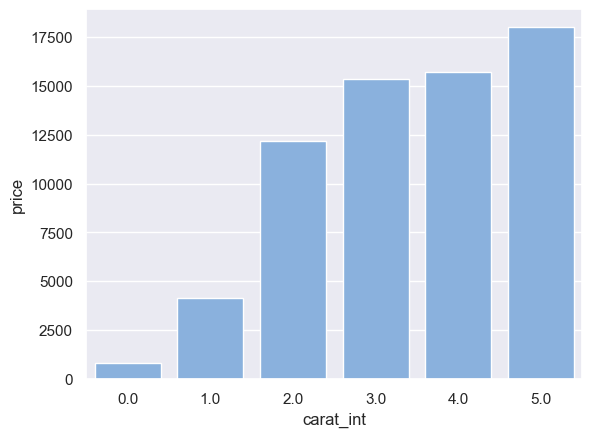

In [38]:
#lets take a look at how carat size (rounded to the nearest integer) relates to price with a bar chart
ax = sns.barplot(x='carat_int', y='price', data=diamonds,
                palette=['#7cb0eb'],
                errwidth=0)

In [46]:
#let's test the null hypothesis that cut quality does not relate to carat size
good = diamonds[diamonds['cut'] == 'Good']
good.reset_index(inplace=True)
good.head()

,index,carat,cut,color,clarity,depth,table,price,x,y,z,carat_int
0,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.0
1,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.0
2,10,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73,0.0
3,17,0.30,Good,J,SI1,63.4,54.0,351,4.23,4.29,2.70,0.0
4,18,0.30,Good,J,SI1,63.8,56.0,351,4.23,4.26,2.71,0.0


In [47]:
premium = diamonds[diamonds['cut'] == 'Premium']
premium.reset_index(inplace=True)
premium.head()

,index,carat,cut,color,clarity,depth,table,price,x,y,z,carat_int
0,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0.0
1,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.0
2,12,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33,0.0
3,14,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27,0.0
4,15,0.32,Premium,E,I1,60.9,58.0,345,4.38,4.42,2.68,0.0


In [48]:
#import stats to perform a t test
from scipy import stats

In [49]:
#performing this t test shows that the pvalue is nearly 0 indicating that we should reject the null hypothesis
#indicating there is some relationship between cut quality and carat size at least for good & premium cuts
stats.ttest_ind(premium['carat'], good['carat'])

Ttest_indResult(statistic=5.146470157351311, pvalue=2.6812005035945057e-07)

In [53]:
#moving on to multivariate analysis, let's take a look at the covariance of the data
diamonds.cov(numeric_only=True)

,carat,depth,table,price,x,y,z,carat_int
carat,0.224687,0.019167,0.192365,1.742765e+03,0.518484,0.515248,0.318917,0.273119
depth,0.019167,2.052404,-0.946840,-6.085371e+01,-0.040641,-0.048009,0.095968,0.020031
table,0.192365,-0.946840,4.992948,1.133318e+03,0.489643,0.468972,0.237996,0.240537
price,1742.765364,-60.853712,1133.318064,1.591563e+07,3958.021491,3943.270810,2424.712613,2077.582816
x,0.518484,-0.040641,0.489643,3.958021e+03,1.258347,1.248789,0.768487,0.658122
y,0.515248,-0.048009,0.468972,3.943271e+03,1.248789,1.304472,0.767320,0.654854
z,0.318917,0.095968,0.237996,2.424713e+03,0.768487,0.767320,0.498011,0.405366
carat_int,0.273119,0.020031,0.240537,2.077583e+03,0.658122,0.654854,0.405366,0.420427


In [54]:
#let's use pandas to take a look at the correlation coefficients of the values
diamonds.corr(numeric_only=True)

,carat,depth,table,price,x,y,z,carat_int
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,0.888624
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,0.021563
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,0.166019
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,0.803159
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,0.904818
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,0.884264
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,0.885896
carat_int,0.888624,0.021563,0.166019,0.803159,0.904818,0.884264,0.885896,1.000000


<Axes: xlabel='carat', ylabel='price'>

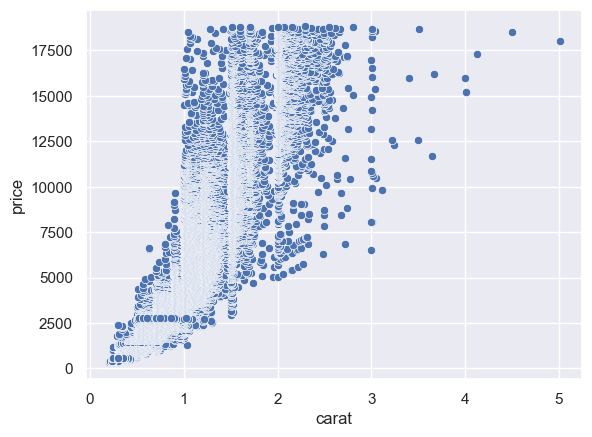

In [64]:
#let's take a further look at the relationship between carat size and total price with a scatterplot
sns.scatterplot(x='carat', y='price', data=diamonds)

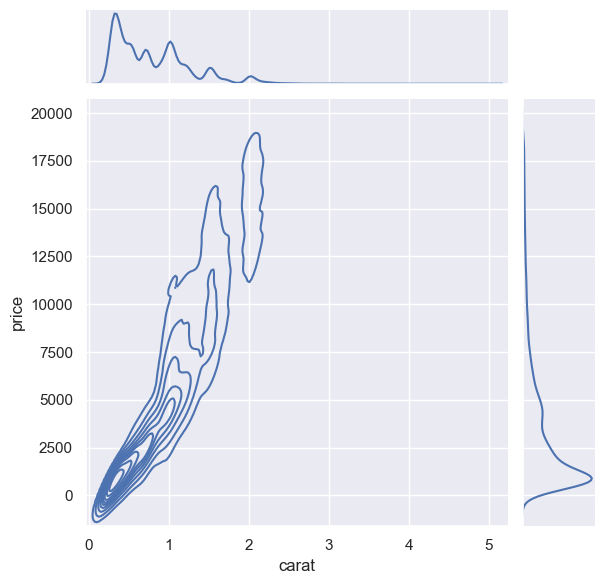

In [61]:
#since there are so many data points, let's look at the distribution with a joint distribution plot utilizing the kde parameter
sns.jointplot(x='carat', y='price', data=diamonds, kind='kde')

<Axes: xlabel='carat_int', ylabel='price'>

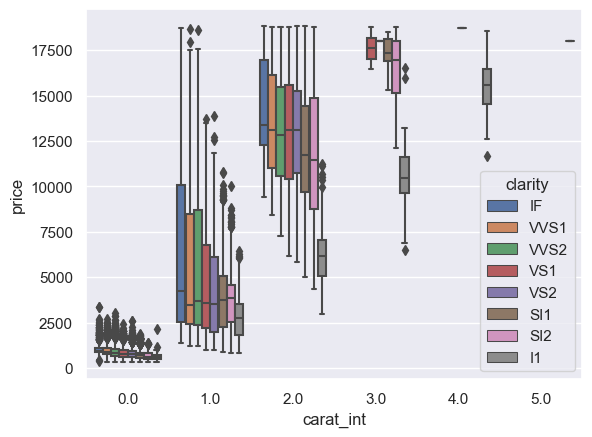

In [62]:
#adding in a bit of complexity, let's look at this relationship in 
#addition to clarity with boxplots using the rounded carat values
sns.boxplot(x='carat_int', y='price', hue='clarity', data=diamonds)

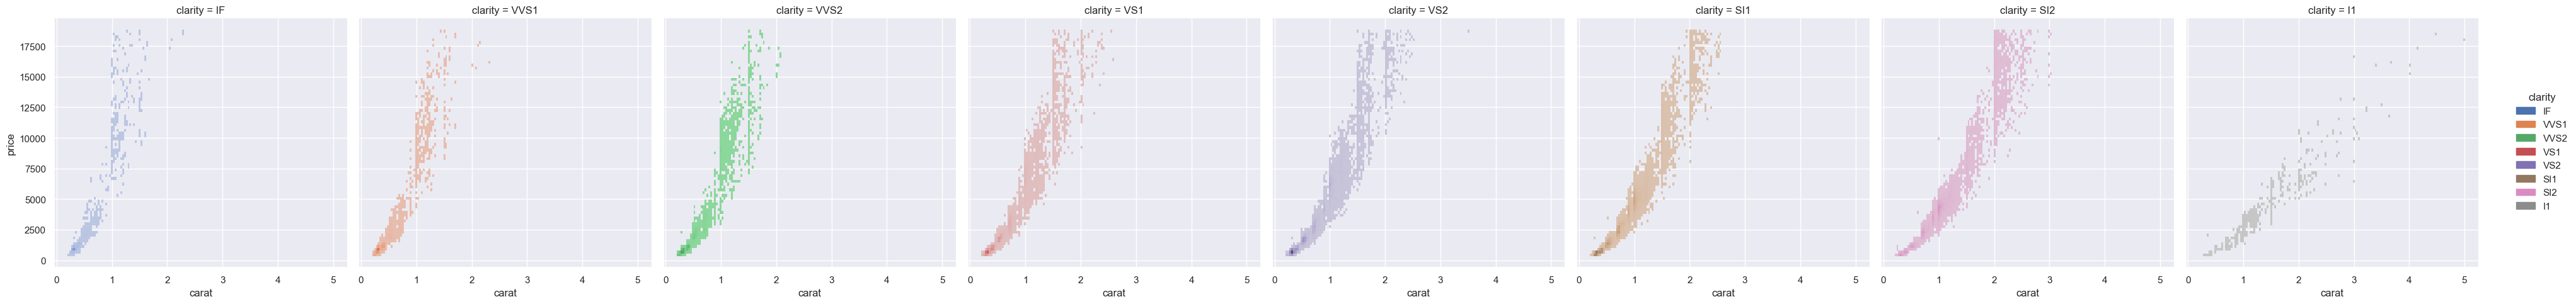

In [15]:
#These distribution plots allow us to see this info in a slightly different way. 
#We can see that as the clarity decreases the carat value has to be generally larger to demand a higher price
sns.displot(data=diamonds, x='carat', y='price', hue='clarity', col='clarity')